In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Admission_Prediction.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
def plots():
    for i in data.columns:
        plt.subplot(3,3,)
        sns.distplot(data[i])

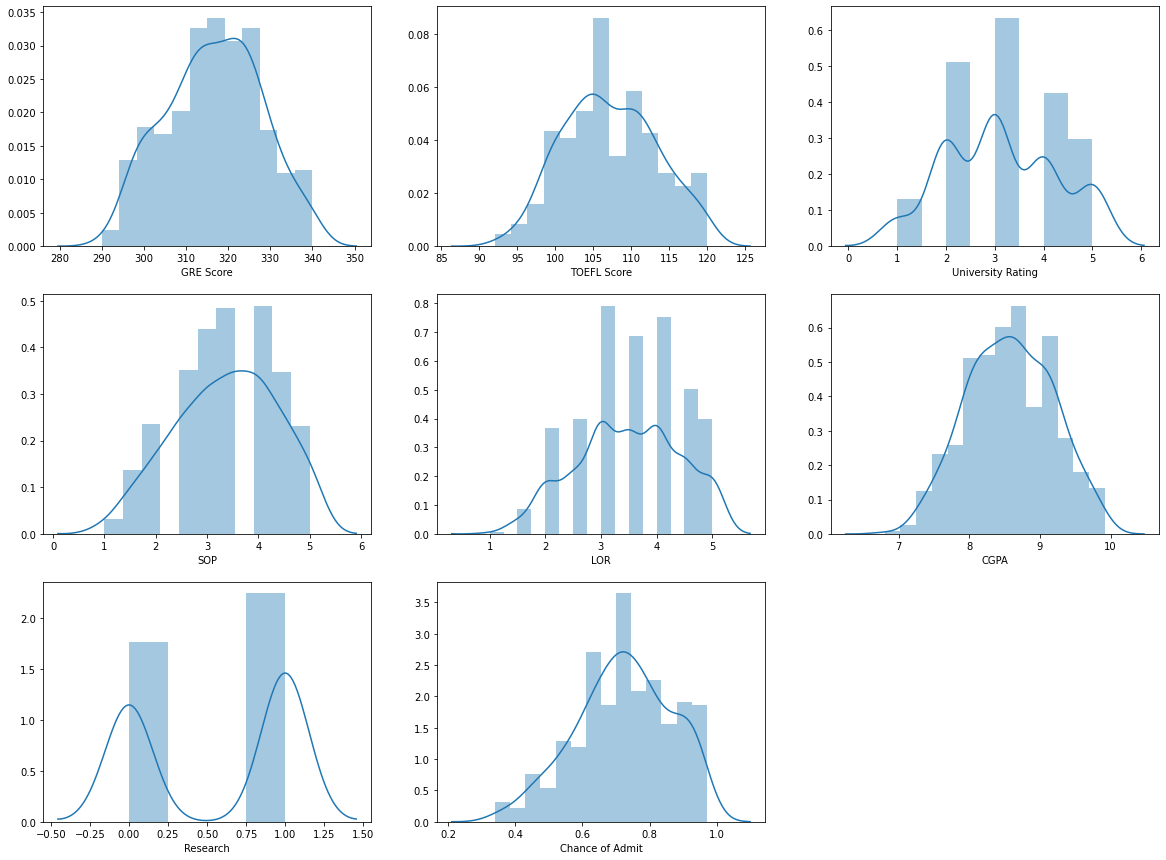

In [7]:
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data["GRE Score"])
plt.subplot(3,3,2)
sns.distplot(data["TOEFL Score"])
plt.subplot(3,3,3)
sns.distplot(data["University Rating"])
plt.subplot(3,3,4)
sns.distplot(data["SOP"])
plt.subplot(3,3,5)
sns.distplot(data["LOR"])
plt.subplot(3,3,6)
sns.distplot(data["CGPA"])
plt.subplot(3,3,7)
sns.distplot(data["Research"])
plt.subplot(3,3,8)
sns.distplot(data["Chance of Admit"])


In [8]:
data["GRE Score"]=data["GRE Score"].fillna(data["GRE Score"].mean())

In [9]:
data["TOEFL Score"]=data["TOEFL Score"].fillna(data["TOEFL Score"].mean())

In [10]:
data["University Rating"]=data["University Rating"].fillna(data["University Rating"].mean())

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


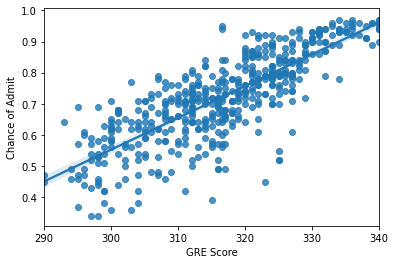

In [12]:
sns.regplot(x=data["GRE Score"],y=data["Chance of Admit"])

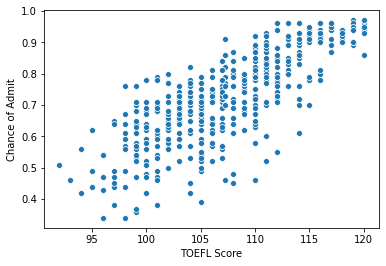

In [13]:
sns.scatterplot(x=data["TOEFL Score"],y=data["Chance of Admit"])

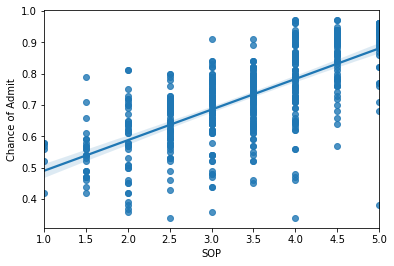

In [14]:
sns.regplot(x=data["SOP"],y=data["Chance of Admit"])

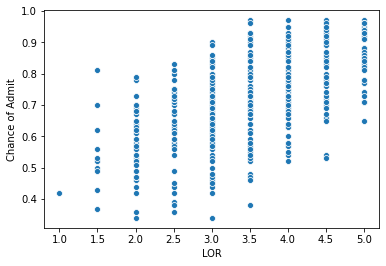

In [15]:
sns.scatterplot(x=data["LOR"],y=data["Chance of Admit"])

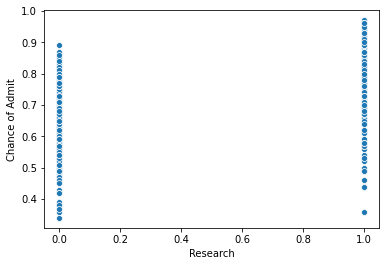

In [16]:
sns.scatterplot(x=data["Research"],y=data["Chance of Admit"])

#### research  does'nt effect much on chance of admission

In [17]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128802,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [18]:
data=data.drop("Serial No.",axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(data)

In [20]:
data=pd.DataFrame(data,columns=["GRE Score","TOEFL Score","University Rating","SOP","LOR","CGPA","Research","Chance of Admit"])

In [21]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.842741e+00,1.788542,0.778906,1.137360,1.098944,1.776806,0.886405,1.406107
1,6.708143e-01,-0.031058,0.778906,0.632315,1.098944,0.485859,0.886405,0.271349
2,5.124333e-15,-0.527313,-0.107877,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,4.905178e-01,0.465197,-0.107877,0.127271,-1.064332,0.154847,0.886405,0.555039
4,-2.306679e-01,-0.692731,-0.994659,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
...,...,...,...,...,...,...,...,...
495,1.392000e+00,0.134360,1.665688,1.137360,0.558125,0.734118,0.886405,1.051495
496,1.842741e+00,1.623124,1.665688,1.642404,1.639763,2.140919,0.886405,1.689797
497,1.211704e+00,2.119379,1.665688,1.137360,1.639763,1.627851,0.886405,1.477030
498,-4.109644e-01,-0.692731,0.778906,0.632315,1.639763,-0.242367,-1.128152,0.058582


In [22]:
x=data.drop("Chance of Admit",axis=1)

In [23]:
y=data.get("Chance of Admit")

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [25]:
x_train.shape,y_train.shape

((350, 7), (350,))

In [26]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
5,1.211704,1.292288,1.665688e+00,1.137360,-0.523513,1.263738,0.886405
116,-1.582891,-0.858149,-1.078766e-01,0.632315,0.017306,0.072094,-1.128152
45,0.490518,0.465197,3.938104e-16,1.642404,0.558125,0.866523,0.886405
16,0.039777,-0.031058,-1.078766e-01,0.632315,-0.523513,0.204499,-1.128152
462,-0.861705,-0.361895,7.789057e-01,-0.377773,-0.523513,-1.053346,-1.128152
...,...,...,...,...,...,...,...
106,1.121555,0.630615,7.789057e-01,1.137360,1.098944,0.998928,0.886405
270,-0.951854,-0.361895,-9.946589e-01,-0.882817,-0.523513,-0.589930,0.886405
348,-1.312447,-1.354404,-1.881441e+00,-1.387862,-1.605151,-2.195338,-1.128152
435,-0.681409,-0.361895,-9.946589e-01,-0.882817,0.558125,-1.483662,-1.128152


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
lr.score(x_test,y_test)

0.8256495569470386

In [30]:
y_pred=lr.predict(x_test)

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8256495569470386

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [33]:
dt_pred=dt_reg.predict(x_test)

In [34]:
dt_reg.score(x_test,y_test)

0.6208948400073016

In [38]:
import pickle
filename = 'Finalized.pickle'
pickle.dump(lr, open(filename, 'wb'))

In [39]:
import pickle
filename = 'Finalized.pickle'
load_model=pickle.load(open(filename,"rb"))

In [40]:

load_model.predict([[310,100,4,4.4,4,6,0]])

array([68.08367233])